# Thăm Dò và Phân Tích Dữ liệu , Xây Dựng Mô Hình ML , Dự đoán Bệnh Tiểu Đường

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

import os


In [8]:
df = pd.read_csv('../data/diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Các cột khác nhau có trong tập dữ liệu là:

* Pregnancies -> Số lần mang thai

* Glucose -> Nồng độ glucose huyết tương

* BloodPressure -> Huyết áp tâm trương (mm Hg)

* SkinThickness -> Độ dày nếp gấp da cơ tam đầu (mm)

* Insulin -> Insulin huyết thanh 2 giờ (mu U/ml)

* BMI -> Chỉ số khối cơ thể

* DiabetesPedigreeFunction -> Chức năng phả hệ của bệnh tiểu đường

* Age -> Tuổi tính theo năm

* Outcome-> Cho dù người phụ nữ có bị tiểu đường hay không, 0 tượng trưng cho người đó không mắc bệnh tiểu đường và 1 tượng trưng cho người đó mắc bệnh tiểu đường.

In [10]:
import pandas as pd


# Tính số lượng lương 0 và 1
counts = df["Outcome"].value_counts()

print(counts)


Outcome
0    500
1    268
Name: count, dtype: int64


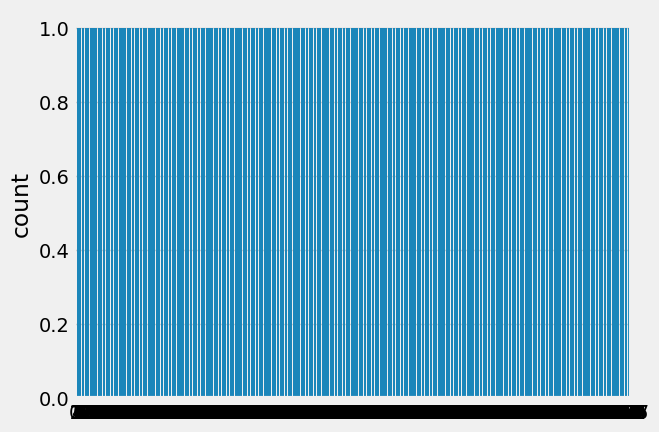

In [5]:
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(df['Outcome'])

plt.show()

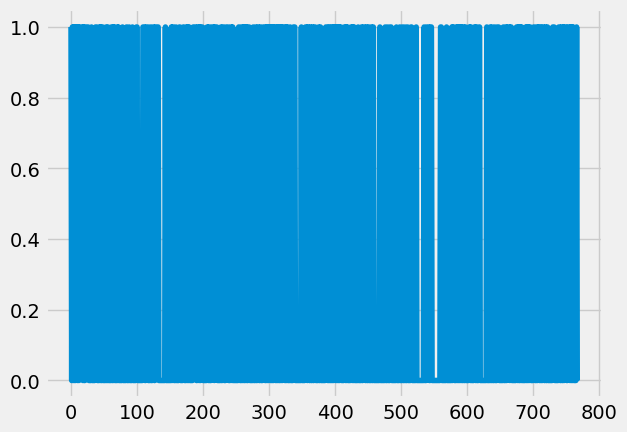

In [6]:

color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

plt.plot(df['Outcome'])
plt.show()

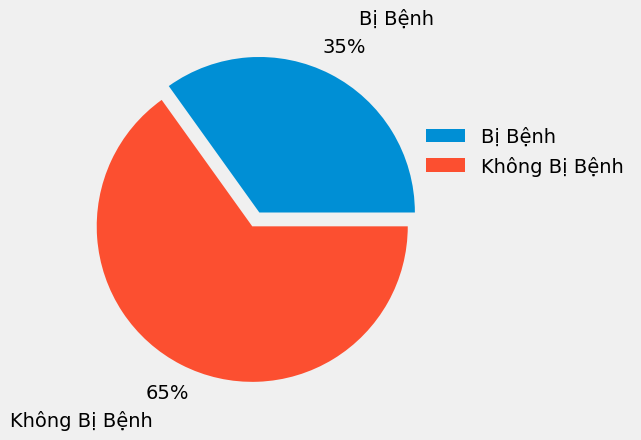

In [11]:
fig, ax = plt.subplots()

labels = ['Bị Bệnh ', 
         'Không Bị Bệnh']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [12]:
for col in df.columns:
    print("Giá trị tối thiểu cho các cột {} is {}".format(col, df[col].min()))

Giá trị tối thiểu cho các cột Pregnancies is 0
Giá trị tối thiểu cho các cột Glucose is 0
Giá trị tối thiểu cho các cột BloodPressure is 0
Giá trị tối thiểu cho các cột SkinThickness is 0
Giá trị tối thiểu cho các cột Insulin is 0
Giá trị tối thiểu cho các cột BMI is 0.0
Giá trị tối thiểu cho các cột DiabetesPedigreeFunction is 0.078
Giá trị tối thiểu cho các cột Age is 21
Giá trị tối thiểu cho các cột Outcome is 0


**Bây giờ, trong số các cột ở trên có số 0 là giá trị tối thiểu, chỉ Cột Mang thai mới có thể lấy các giá trị bằng 0, vậy chúng ta nên làm gì với những cột có số 0 là giá trị tối thiểu ngay cả khi chúng không được phép như vậy?**


# Null Values

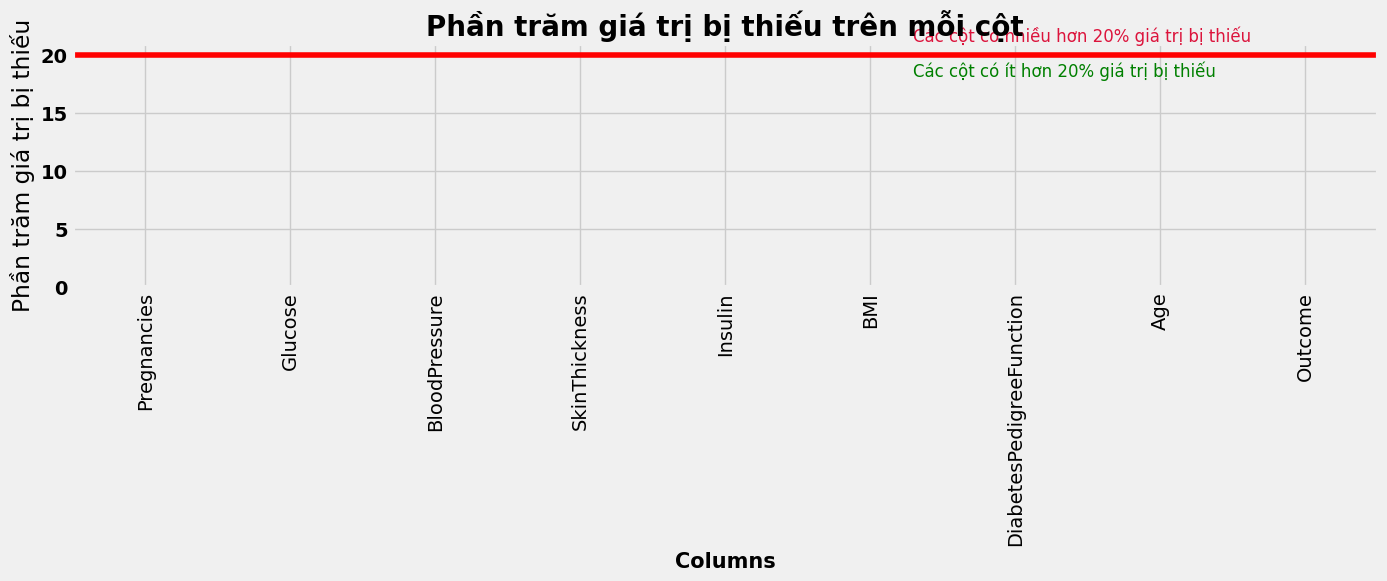

In [13]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Phần trăm giá trị bị thiếu trên mỗi cột', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Các cột có nhiều hơn {thresh}% giá trị bị thiếu', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Các cột có ít hơn {thresh}% giá trị bị thiếu', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Phần trăm giá trị bị thiếu')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

**Bạn có thể thắc mắc rằng không có giá trị null nào trong tập dữ liệu, nhưng bạn có chắc không? Hãy nhớ những gì chúng ta đã thảo luận ở phần trước, trong đó một số cột nhất định có giá trị cực tiểu bằng 0 mặc dù lẽ ra chúng không phải như vậy. Những giá trị đó sẽ được coi là giá trị null. Hãy thay thế các số 0 có trong các cột Glucose, BloodPressure, SkinThickness, Insulin và BMI bằng null**.****Bạn có thể thắc mắc rằng không có giá trị null nào trong tập dữ liệu, nhưng bạn có chắc chắn không? Hãy nhớ những gì chúng ta đã thảo luận ở phần trước, trong đó một số cột nhất định có giá trị cực tiểu bằng 0 mặc dù lẽ ra chúng không phải như vậy. Những giá trị đó sẽ được coi là giá trị null. Hãy thay thế các số 0 có trong các cột Glucose, BloodPressure, SkinThickness, Insulin và BMI bằng null.**

In [14]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

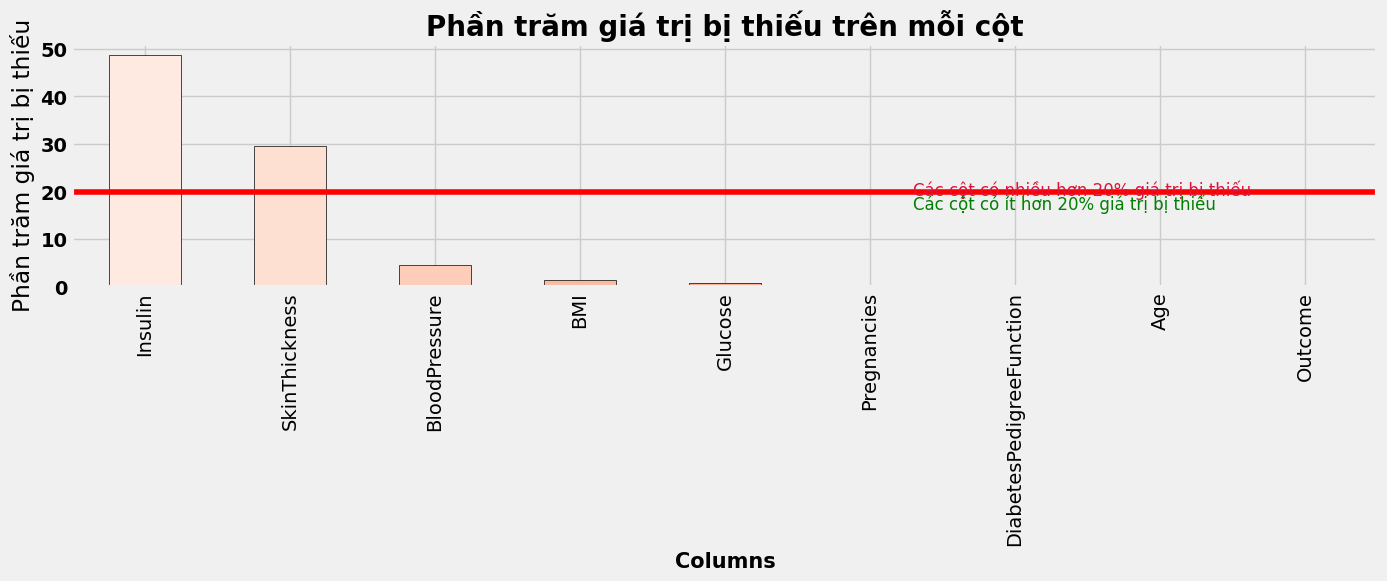

In [15]:
msv_1(df, 20, color=sns.color_palette('Reds',15))

# Thăm dò ,Phân tích dữ liệu

**Trong phần này, ta sẽ thực hiện một số Phân tích dữ liệu khám phá cơ bản để có được "cảm nhận" về dữ liệu, chúng tôi sẽ kiểm tra sự phân bổ, mối tương quan, v.v. của các cột khác nhau và cố gắng loại bỏ các giá trị null hiện có.**

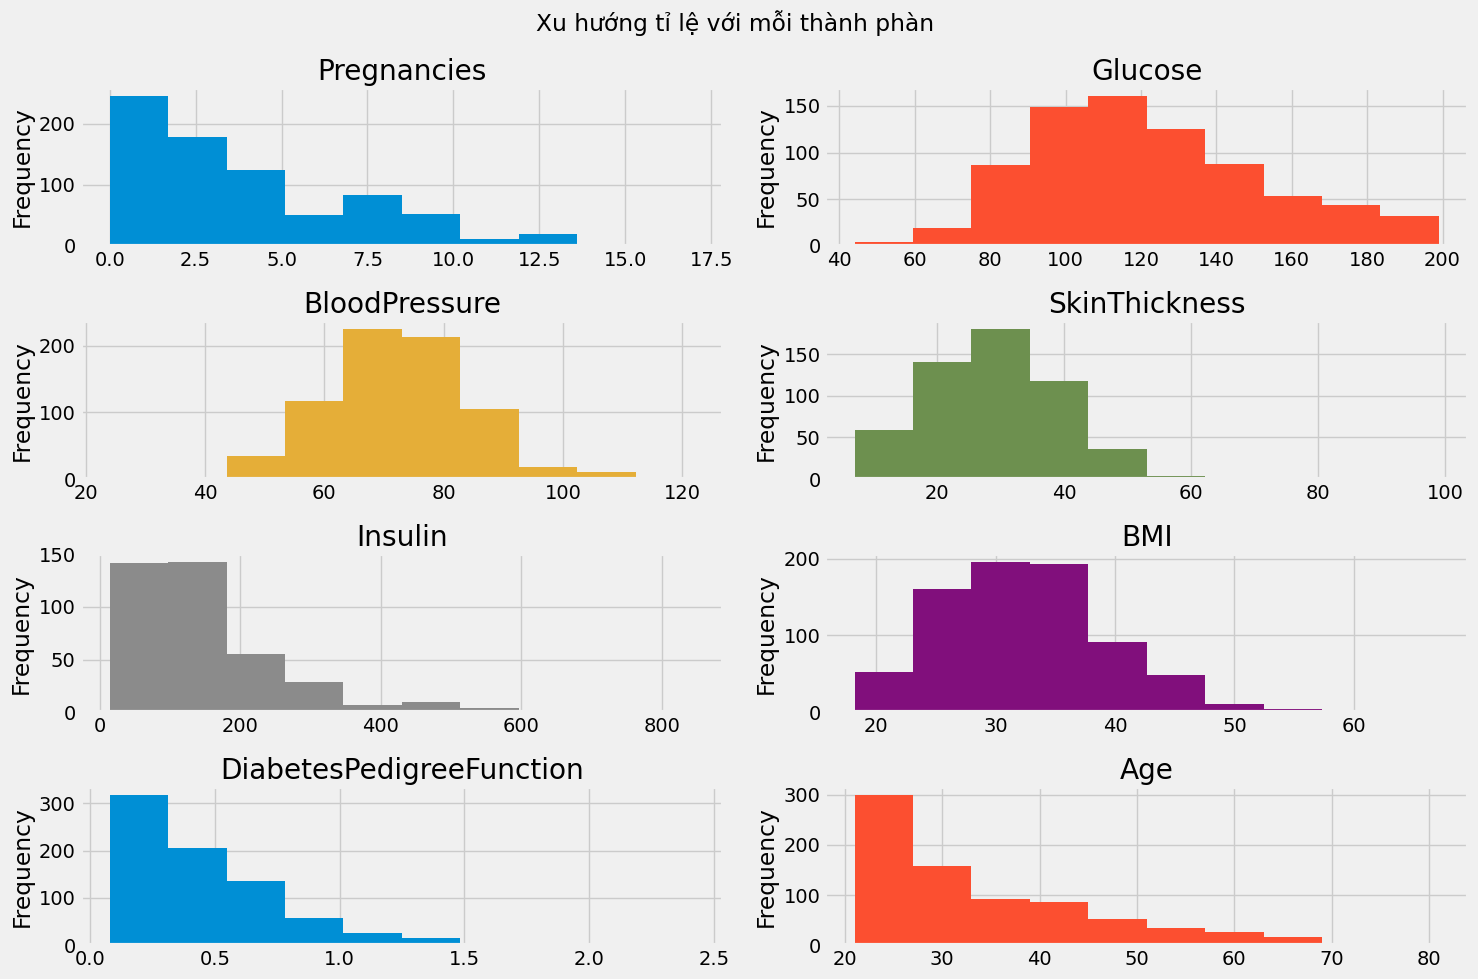

In [16]:

fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Xu hướng tỉ lệ với mỗi thành phàn ')
plt.tight_layout()
plt.show()

**Hãy kiểm tra độ lệch(skewness) của từng cột.**

**Độ lệch(skewness) đề cập đến mức độ bất đối xứng trong tính năng nhất định hay nói cách khác là mức độ biến dạng so với phân phối chuẩn. Đỉnh của biểu đồ biểu thị chế độ.**

In [17]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Độ Lệch Từng cột {} Là {}".format(col, df[col].skew()))

Độ Lệch Từng cột Pregnancies Là 0.9016739791518588
Độ Lệch Từng cột Glucose Là 0.5309885349396285
Độ Lệch Từng cột BloodPressure Là 0.13415273171959252
Độ Lệch Từng cột SkinThickness Là 0.690619013984192
Độ Lệch Từng cột Insulin Là 2.166463843812443
Độ Lệch Từng cột BMI Là 0.5939697505712673
Độ Lệch Từng cột DiabetesPedigreeFunction Là 1.919911066307204
Độ Lệch Từng cột Age Là 1.1295967011444805


**Các cột như Pregnancies, Glucose, BloodPressure, Độ dày của da và BMI không bị sai lệch nhiều. ta có thể điền giá trị null bằng giá trị trung bình cho các cột này, nhưng đối với các cột như Insulin và DiabPedigreeFunction, chúng ta sẽ phải thay thế chúng bằng giá trị trung bình do ảnh hưởng của độ lệch.**

In [18]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median()) # Điền giá trị null bằng số trung vị.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df[col] = df[col].fillna(df[col].mean())

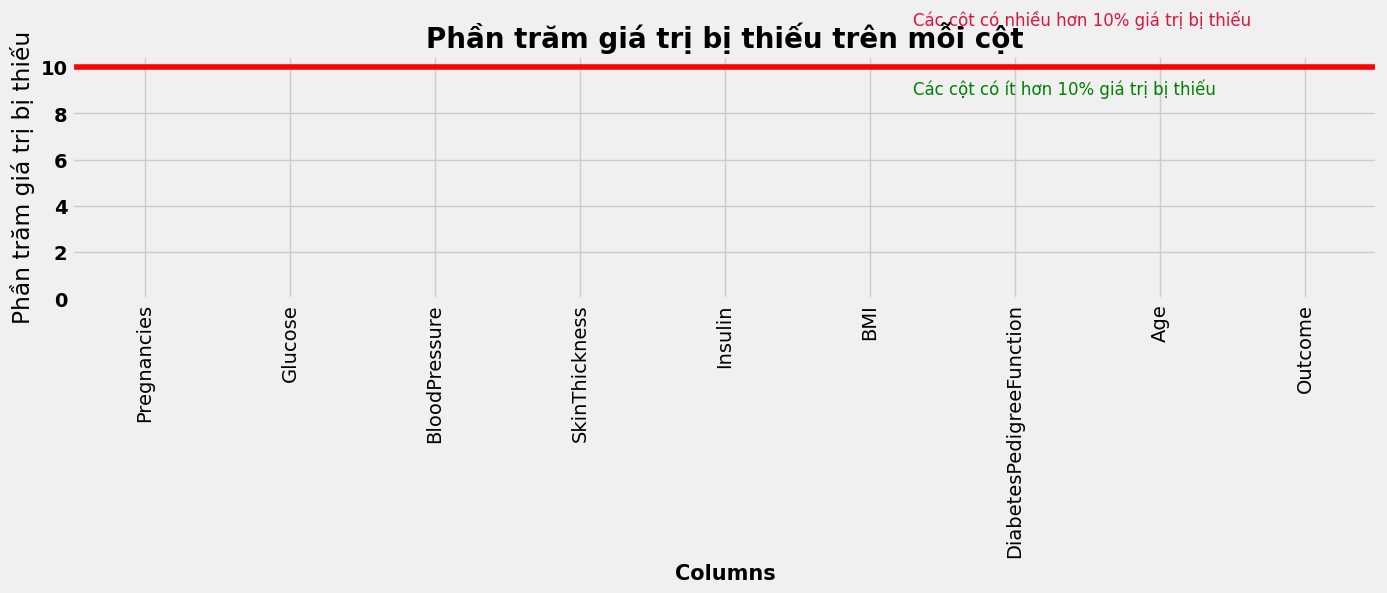

In [19]:
msv_1(df, 10, color=sns.color_palette('Greens',15))

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Tất cả các giá trị null đều được xử lý ngay bây giờ**

In [21]:
def mean_target(var):
    """
    hàm sẽ trả về giá trị trung bình cho cột 'var' tùy thuộc vào việc người đó có
     có bị tiểu đường hay không
    """
    return pd.DataFrame(df.groupby('Outcome').mean()[var])

In [22]:
def distplot(col_name):
    """
    hàm sẽ vẽ đồ thị phân bổ cột 'col_name' riêng biệt cho người mắc bệnh tiểu đường và người không mắc bệnh tiểu đường
    """
    plt.figure()
    ax = sns.distplot(df[col_name][df.Outcome == 1], color ="red", rug = True)
    sns.distplot(df[col_name][df.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Bị Bệnh', 'Không Bị Bệnh'])

# Preganancies

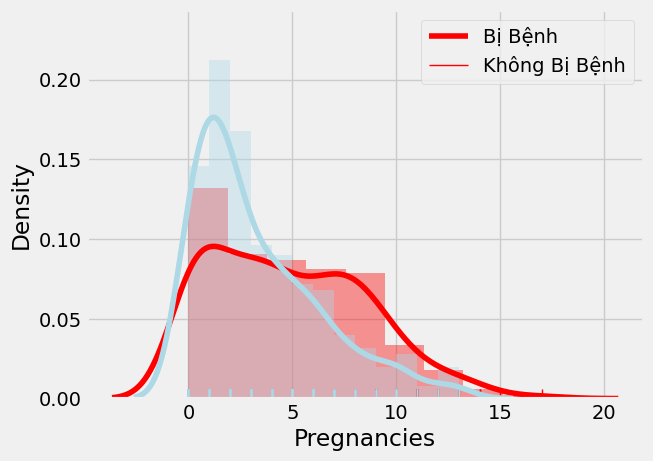

In [23]:
distplot('Pregnancies')

In [24]:
mean_target('Pregnancies')

,Pregnancies
Outcome,
0,3.298000
1,4.865672


**Chúng ta có thể thấy rằng tỷ lệ mang thai ở người mắc bệnh tiểu đường rất cao**

# Insulin

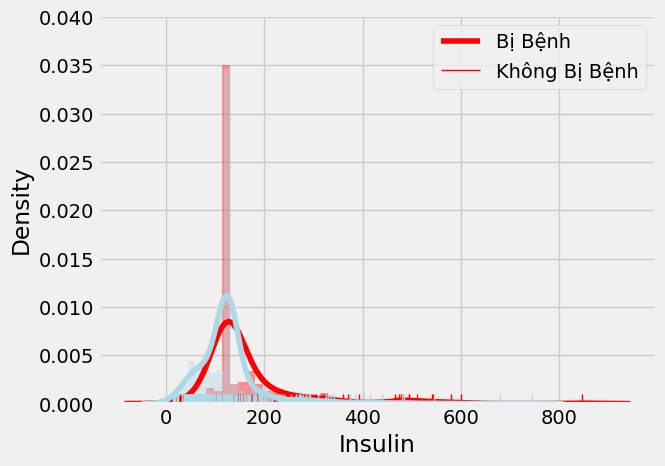

In [25]:
distplot('Insulin')

In [26]:
mean_target('Insulin')

,Insulin
Outcome,
0,127.792000
1,164.701493


**Những người mắc bệnh tiểu đường thường có mức Insulin cao hơn.**

# BloodPressure

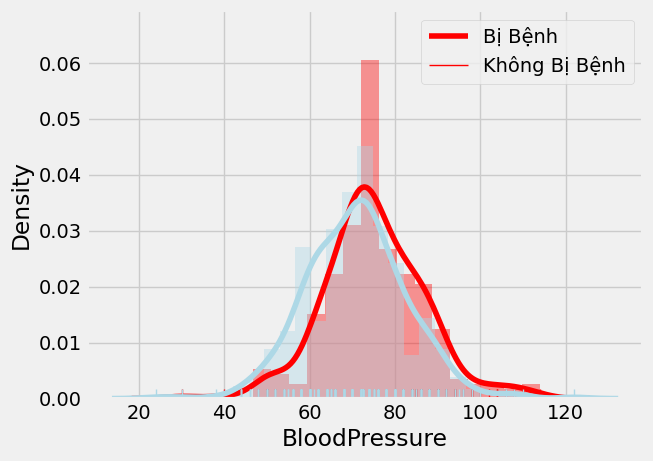

In [27]:
distplot('BloodPressure')

In [28]:
mean_target('BloodPressure')

,BloodPressure
Outcome,
0,70.935397
1,75.147324


**Huyết áp trung bình ở người mắc bệnh tiểu đường cao hơn so với người không mắc bệnh tiểu đường**

# Glucose

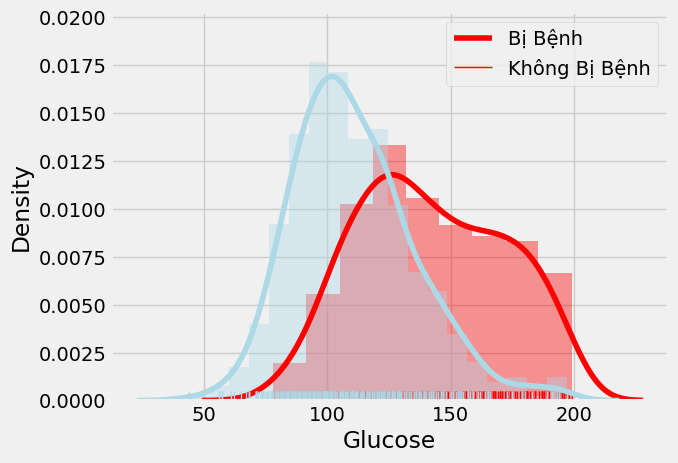

In [29]:
distplot('Glucose')

**Người mắc bệnh tiểu đường có xu hướng có mức Glucose cao hơn nhiều**

# Phân tích con người theo cách bình thường

**Suy nghĩ như một người bình thường và phân tích dữ liệu.**

**Đầu tiên, ta sẽ biết ảnh hưởng của Tuổi tác đến Kết quả là gì vì chúng ta nghe nói rằng khi tuổi tác tăng lên thì nguy cơ mắc bệnh tiểu đường cũng thường tăng lên.**

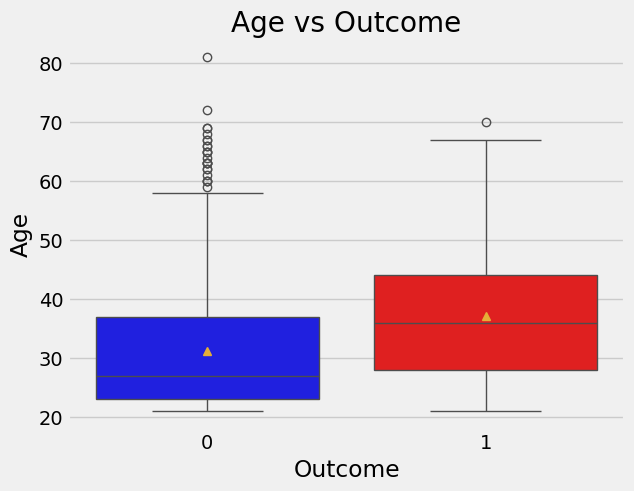

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary of colors
colors = {
    '0': 'blue',
    '1': 'red',
}

# Create a boxplot
sns.boxplot(
    x='Outcome',
    y='Age',
    data=df,
    palette=colors,
    showmeans=True,
)

# Add a title to the plot
plt.title('Age vs Outcome')

# Show the plot
plt.show()


**Đúng, ta đã đúng, độ tuổi trung bình của người mắc bệnh tiểu đường cao hơn độ tuổi trung bình của người không mắc bệnh tiểu đường.**

**Chúng ta cũng hãy kiểm tra ảnh hưởng của BloodPressure đến Kết quả.**

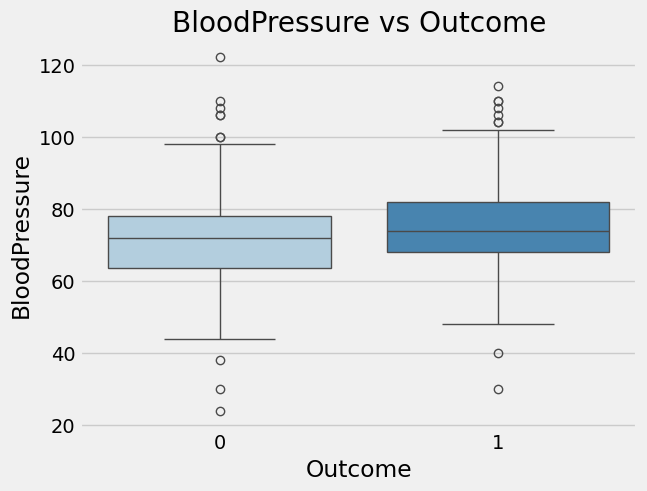

In [31]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df, palette = 'Blues')
plt.title('BloodPressure vs Outcome')
plt.show()

**Độ tuổi Trung Bình BloodPressure của người mắc bệnh tiểu đường nằm gần với phần trăm  thứ 75 ở người không mắc bệnh tiểu đường.** **Điều tiếp theo mà một người bình thường sẽ kiểm tra là mối quan hệ giữa Age và BloodPressure**

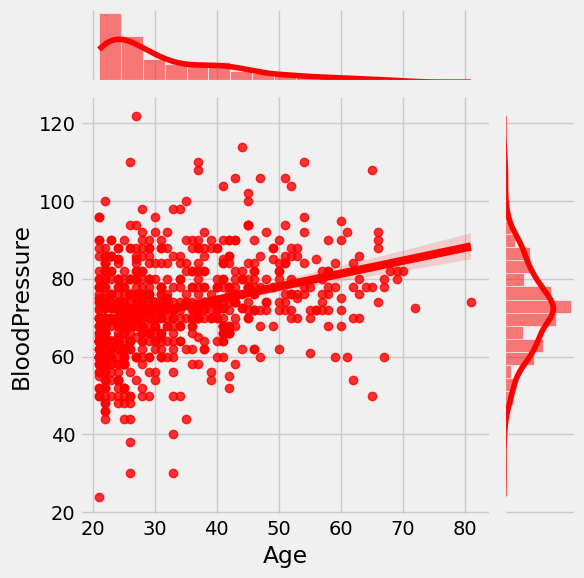

In [32]:
sns.jointplot(x='Age',y='BloodPressure', data=df, kind = 'reg', color = 'red')

**Hmm, tuổi càng cao thì huyết áp cũng tăng theo**

**Người ta cũng muốn biết nguy cơ mắc bệnh tiểu đường nếu bệnh này phổ biến trong gia đình. Chúng ta có thể kiểm tra điều đó bằng Diabetes Pedigree Function(Chức năng phả hệ bệnh tiểu đường).**

**Càng nhiều chấm, huyết áp càng tốt**

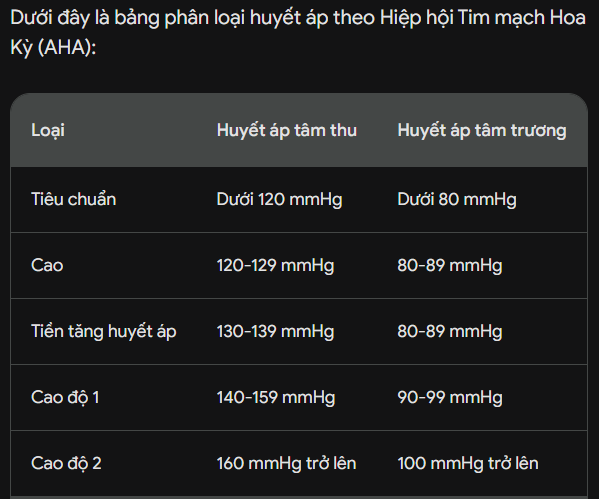

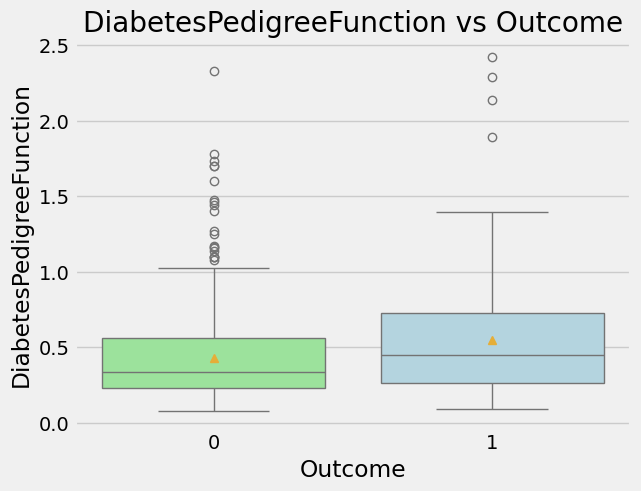

In [33]:
my_pal = {
    '0': "lightgreen",
    '1': "lightblue"}
sns.boxplot(
    x = 'Outcome', 
    y = 'DiabetesPedigreeFunction',
      data = df, palette=my_pal,
        showmeans=True
        )
plt.title('DiabetesPedigreeFunction vs Outcome')
plt.show()

**Khá nhiều người có DPF cao không mắc bệnh Tiểu đường. Nhưng thông thường những người mắc bệnh tiểu đường có giá trị DPF gần bằng 0,5 (Phần trăm thứ 50)**

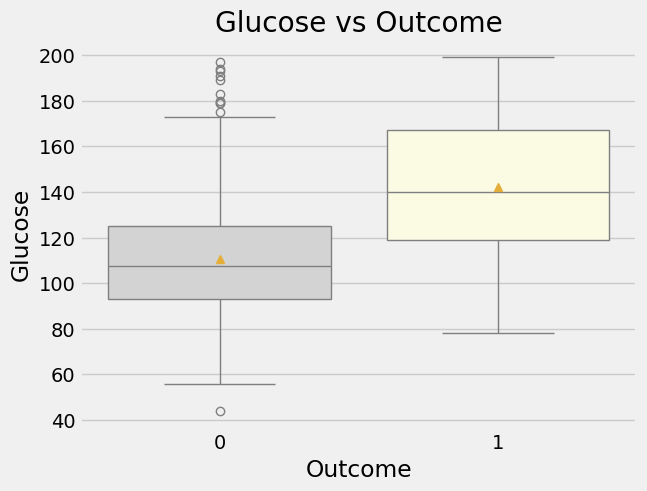

In [34]:
my_pal = {'0': "lightgrey", '1': "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = my_pal,showmeans=True)
plt.title('Glucose vs Outcome')
plt.show()

**WOW! mức trung bình của mức Glucose của người mắc bệnh tiểu đường lớn hơn Phần trăm thứ 75 của mức glucose của người không mắc bệnh tiểu đường. Do đó, mức đường huyết cao sẽ làm tăng nguy cơ mắc bệnh tiểu đường.**

## Insulin

**Let's first check whether there is any relation between glucose and insulin level.**

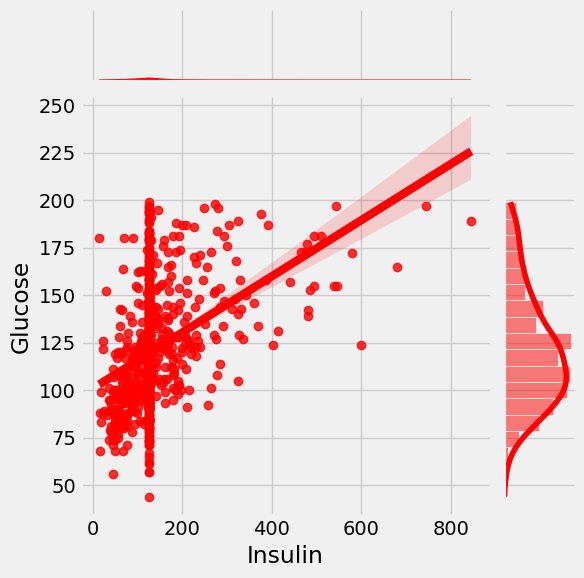

In [35]:
sns.jointplot(x='Insulin',y='Glucose', data=df, kind = 'reg', color = 'red')
plt.show()

**We can see that as the insulin level increases, the Glucose level also increases.**

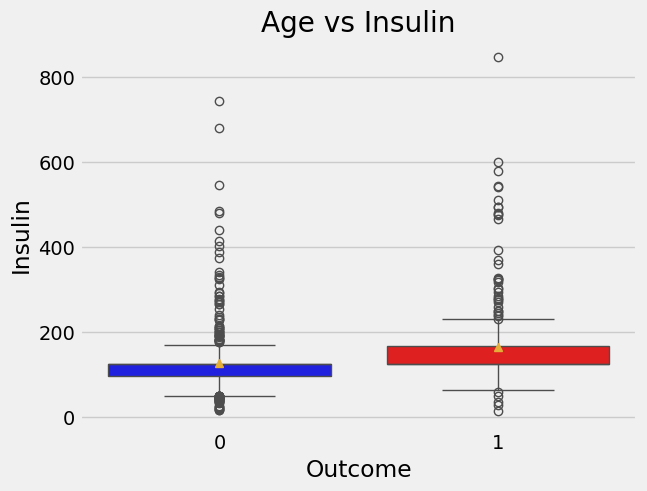

In [36]:
# Create a dictionary of colors
colors = {
    '0': 'blue',
    '1': 'red',
}

# Create a boxplot
sns.boxplot(
    x='Outcome',
    y='Insulin',
    data=df,
    palette=colors,
    showmeans=True,
)

# Add a title to the plot
plt.title('Age vs Insulin')

# Show the plot
plt.show()

## Body Mass Index

**Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. Does having a higher BMI leads to more chances of being diabetic? Let's check that out!**

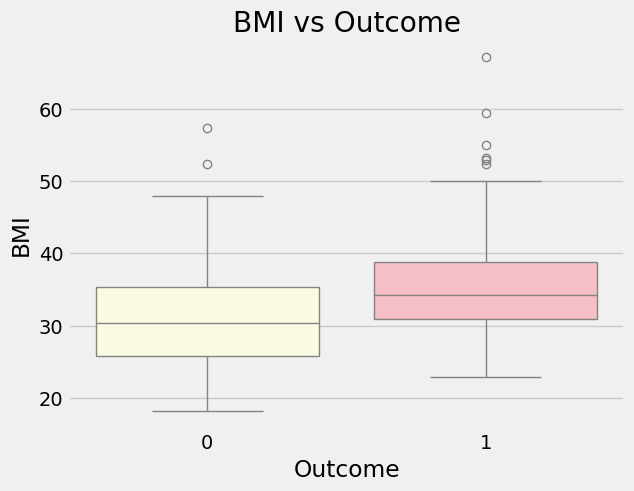

In [37]:
my_pal = {'0': "lightyellow", '1': "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

**Indeed, the Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people.**

# Correlation Matrix

<Axes: >

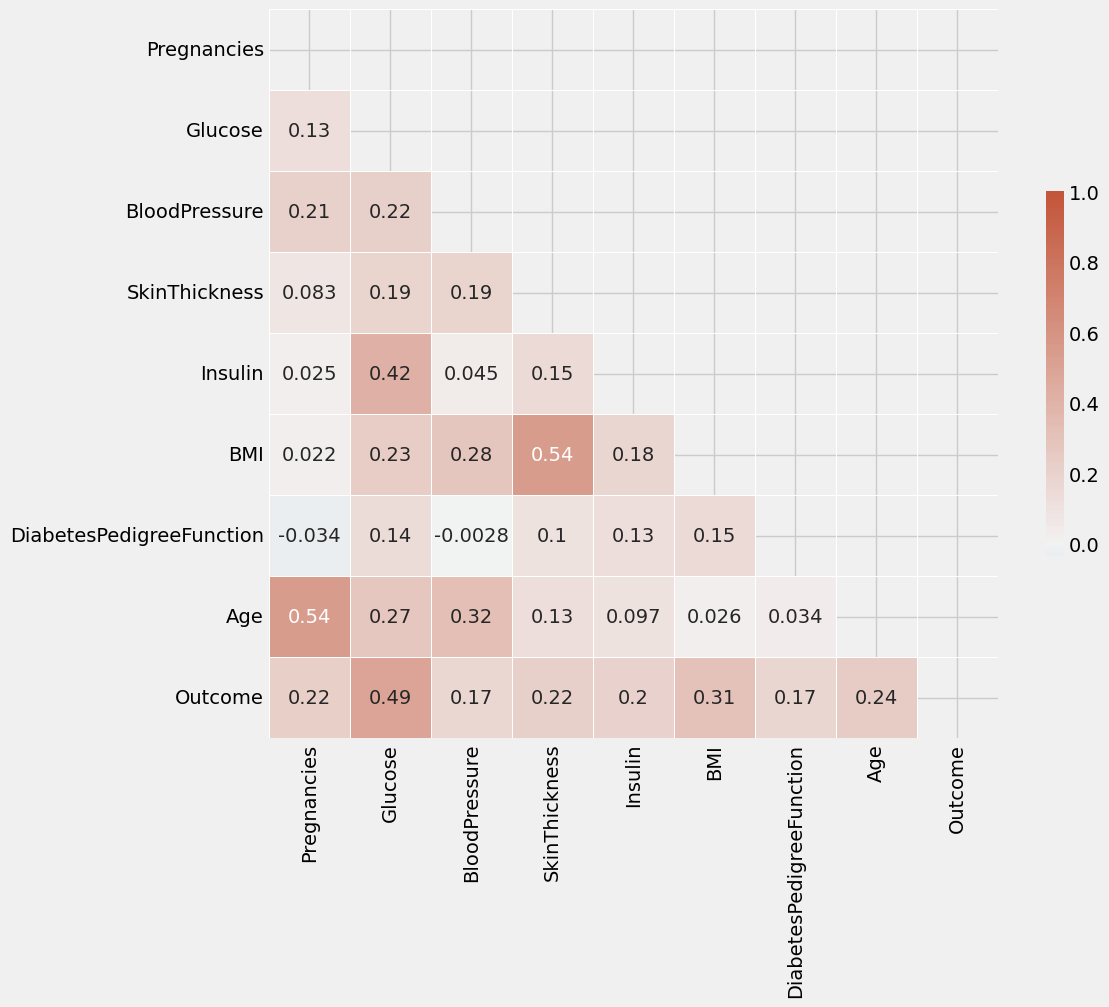

In [38]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Dòng này tạo một figure Matplotlib với kích thước tùy chỉnh (11x9) và một trục phụ (ax) để chứa heatmap
f, ax = plt.subplots(figsize=(11, 9))

# Dòng này sử dụng hàm sns.diverging_palette() từ thư viện Seaborn để tạo một colormap phân kỳ, cho phép phân biệt rõ ràng giữa các giá trị tương quan dương và âm trên heatmap. Hai tham số 230 và 20 xác định màu sắc cho các giá trị tương quan dương và âm
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

**Từ bản đồ nhiệt ở trên, chúng ta có thể nhận thấy rằng tất cả các đặc điểm đều có mối tương quan yếu, do đó loại bỏ hiện tượng đa cộng tuyến ra khỏi phương trình. Đa cộng tuyến (cũng là cộng tuyến) là một hiện tượng trong đó một biến dự đoán trong mô hình hồi quy bội có thể được dự đoán tuyến tính từ các biến khác với mức độ chính xác đáng kể. Các mô hình như Hồi quy logistic giả định sự hiện diện của hiện tượng không cộng tuyến giữa các đặc điểm, nếu có hiện tượng đa cộng tuyến, điều đó có thể dẫn đến hiệu suất kém của các mô hình đó.**

# Chia tập dữ liệu và chia tỷ lệ tính năng

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

**Chuẩn hóa tập dữ liệu bao gồm việc thay đổi tỷ lệ phân bổ các giá trị sao cho giá trị trung bình của các giá trị quan sát được bằng 0 và độ lệch chuẩn là 1.**

**Điều này có thể được coi là trừ giá trị trung bình hoặc căn giữa dữ liệu. Chia tỷ lệ các tính năng là vô cùng quan trọng vì các tính năng khác nhau có tỷ lệ khác nhau. Giả sử Tuổi có các giá trị ở dạng hai chữ số, trong khi DPF thuộc loại nổi, tác dụng của tính năng Tuổi sẽ nhiều hơn so với DPF**

**Cách tốt nhất là chỉ sử dụng tập huấn luyện để tìm ra cách chia tỷ lệ/chuẩn hóa, sau đó áp dụng một cách mù quáng phép biến đổi tương tự cho tập kiểm tra.**

**Ví dụ: giả sử bạn chuẩn hóa dữ liệu bằng cách loại bỏ giá trị trung bình và chia phương sai. Nếu bạn sử dụng toàn bộ tập dữ liệu để tìm ra giá trị trung bình và phương sai của đặc điểm, thì bạn đang sử dụng kiến thức về phân bố của tập kiểm tra để đặt thang đo cho tập huấn luyện - thông tin 'rò rỉ'.**

**Cách đúng đắn để thực hiện việc này là chỉ sử dụng tập huấn luyện để tính giá trị trung bình và phương sai, chuẩn hóa tập huấn luyện, sau đó tại thời điểm kiểm tra, sử dụng chính giá trị trung bình (huấn luyện) và phương sai đó để chuẩn hóa tập kiểm tra.**

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

# Baseline Models

In [41]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 78.99%
_______________________________________________
F1 Score: 0.66
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.803828    0.753165  0.789931    0.778496      0.786148
recall       0.896000    0.592040  0.789931    0.744020      0.789931
f1-score     0.847415    0.662953  0.789931    0.755184      0.783045
support    375.000000  201.000000  0.789931  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[336  39]
 [ 82 119]]


Test Result:
Accuracy Score: 72.40%
_______________________________________________
F1 Score: 0.56
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.760870   0.629630  0.723958    0.695250      0.715072
recall       0.840000   0.507463  0.723958    0.673731      0.723958
f1-score 

**Điểm F1 mà chúng tôi nhận được khi sử dụng Hồi quy logistic là rất ít và trong Ma trận nhầm lẫn, có thể thấy 53 dự đoán sai đã được đưa ra. Chúng tôi cần cải thiện nó.**

In [43]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 70.83%
_______________________________________________
F1 Score: 0.56
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.759398   0.593220  0.708333    0.676309      0.701409
recall       0.808000   0.522388  0.708333    0.665194      0.708333
f1-score     0.782946   0.555556  0.708333    0.669251      0.70

**Chúng tôi biết rằng Trình phân loại cây quyết định có xu hướng trang bị quá mức và đó là những gì chúng tôi có ở đây. Chúng ta có thể thấy độ chính xác của tàu là 100% nhưng độ chính xác của bài kiểm tra chỉ là 67,71%. Chúng tôi cũng biết rằng Trình phân loại rừng ngẫu nhiên giúp khắc phục nhược điểm này của Trình phân loại cây quyết định. Hãy cùng kiểm tra mô hình đó.**

In [45]:
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)

## Random Forest Classifier

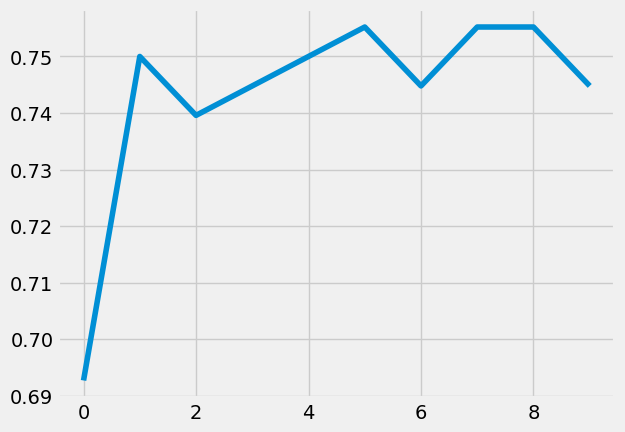

In [46]:
from sklearn.ensemble import RandomForestClassifier
## Finding out the right number of estimators
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
plt.plot(accuracy_scores)

**Maximum test accuracy is achieved using 500 trees**

In [47]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 72.92%
_______________________________________________
F1 Score: 0.58
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision    0.77037   0.631579  0.729167    0.700975      0.721938
recall       0.83200   0.537313  0.729167    0.684657      0.729167
f1-score     0.80000   0.580645  0.729167    0.690323      0.723454

**Ở đây, mô hình cũng đã được trang bị quá mức, nhưng độ chính xác của thử nghiệm đã tăng lên 74%. Và 50 dự đoán sai đang được đưa ra. Chúng ta cũng có thể nhận thấy rằng độ chính xác, khả năng thu hồi và điểm F1 thấp hơn đối với những người mắc bệnh tiểu đường. Điều này có nghĩa là thiếu trường hợp huấn luyện cho kết quả '1'. Chúng tôi sẽ sử dụng Xác thực chéo sau trong sổ tay**

In [48]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

# KNN

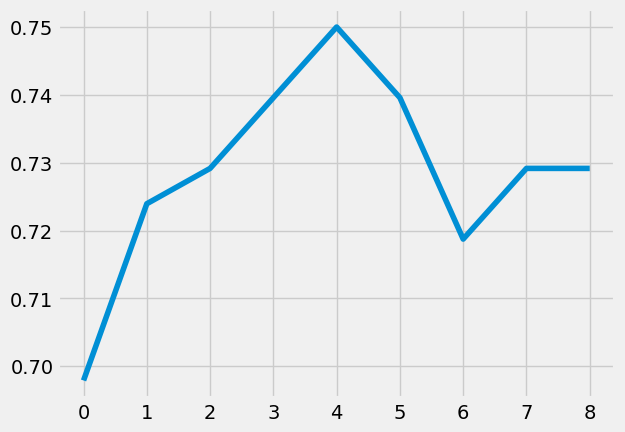

In [49]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(accuracy_scores)

In [50]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 81.25%
_______________________________________________
F1 Score: 0.72
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.841432    0.751351    0.8125    0.796392      0.809998
recall       0.877333    0.691542    0.8125    0.784438      0.812500
f1-score     0.859008    0.720207    0.8125    0.789608      0.810572
support    375.000000  201.000000    0.8125  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[329  46]
 [ 62 139]]

Test Result:
Accuracy Score: 72.92%
_______________________________________________
F1 Score: 0.59
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.774436   0.627119  0.729167    0.700777      0.723028
recall       0.824000   0.552239  0.729167    0.688119      0.729167
f1-score  

In [51]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

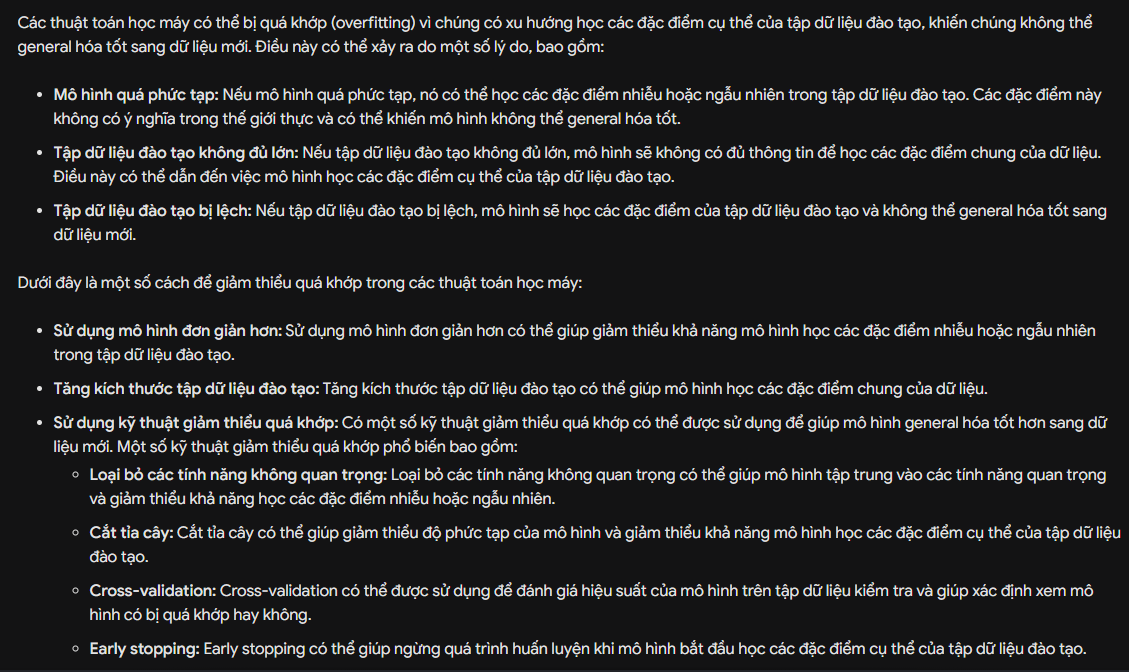

## XGBoost

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.15)
xgb.fit(X_train, y_train)

evaluation(xgb, X_train, y_train, X_test, y_test, True)
evaluation(xgb, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]

Test Result:
Accuracy Score: 76.04%
_______________________________________________
F1 Score: 0.63
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.796992   0.677966  0.760417    0.737479      0.755457
recall       0.848000   0.597015  0.760417    0.722507      0.760417
f1-score     0.821705   0.634921  0.760417    0.728313      0.756

In [53]:
train_score_xgb = round(accuracy_score(y_train, xgb.predict(X_train)) * 100, 2)
test_score_xgb = round(accuracy_score(y_test, xgb.predict(X_test)) * 100, 2)

In [54]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn, train_score_xgb],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn, test_score_xgb]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor', 'XGBoost'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,78.99,72.40
Decision Tree Classifier,100.00,70.83
Random Forest Classifier,100.00,72.92
K-Nearest Neighbor,81.25,72.92
XGBoost,100.00,76.04


**Chúng ta có thể quan sát từ khung dữ liệu trên rằng Trình phân loại cây quyết định, Trình phân loại rừng ngẫu nhiên và XGBoost đều đã trang bị quá mức cho tập dữ liệu đã cho. Hãy cùng khám phá kết quả khi chúng tôi sử dụng Xác thực chéo.**

# Cross Validation

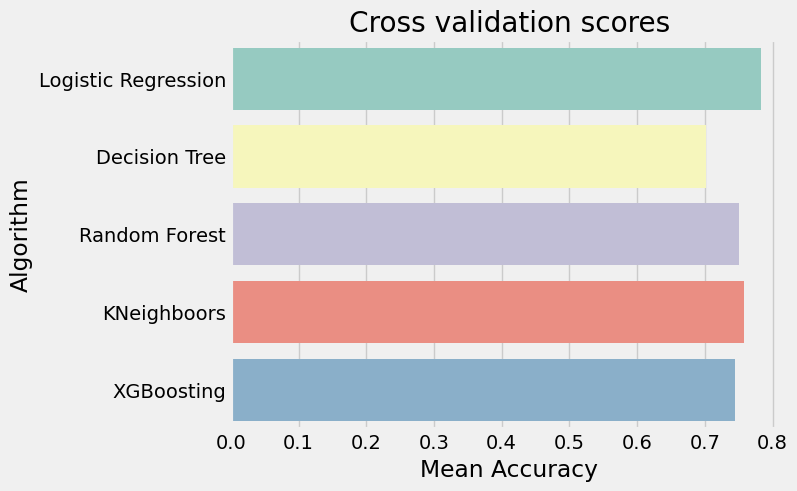

In [55]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

kfold = StratifiedKFold(n_splits=10)

random_state = 0
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state, n_estimators = 500))
classifiers.append(KNeighborsClassifier())
classifiers.append(XGBClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression","Decision Tree",
"Random Forest", "KNeighboors", "XGBoosting"]})

# Create the barplot
g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3", orient="h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

plt.show()

In [56]:
cv_res.head()

,CrossValMeans,CrossValerrors,Algorithm
0,0.783091,0.035100,Logistic Regression
1,0.701270,0.046378,Decision Tree
2,0.750121,0.048499,Random Forest
3,0.757139,0.053968,KNeighboors
4,0.744676,0.042400,XGBoosting


**Từ bảng trên, chúng ta có thể nhận thấy rằng chúng ta thu được kết quả tốt nhất cho Thuật toán hồi quy logistic, độ chính xác trong trường hợp này là 78,3%. Kết quả của Rừng ngẫu nhiên và KNeighbors Classifer cũng không tệ. Hãy thử Điều chỉnh siêu tham số bằng GridSearchCv cho Trình phân loại rừng ngẫu nhiên và Trình phân loại XGBoost**

# Hyperparameter Tuning

### Random Forest Classifier

In [57]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.7725347852389595

**By Hyperparameters tuning, we get the best accuracy as 77% and the hyperparameters that give the best result are shown below.**

In [58]:
print(RFC_best)

RandomForestClassifier(bootstrap=False, max_features=1, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=300)


### XGBoost Classifier

In [59]:
XGB = XGBClassifier(verbosity=0)
gb_param_grid = {'loss': ["deviance"],
                  'n_estimators': [100, 200, 300],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [4, 8],
                  'min_samples_leaf': [100, 150],
                  'max_features': [0.3, 0.1]
                  }

gsXGB = GridSearchCV(XGB, param_grid=gb_param_grid, cv=kfold, scoring="accuracy")

gsXGB.fit(X_train, y_train)

if gsXGB.best_estimator_:
    XGB_best = gsXGB.best_estimator_
    # Best score
    best_score = gsXGB.best_score_
else:
    print("No best estimator found. Please check the hyperparameter grid or the training data.")


In [60]:
print(XGB_best)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, loss='deviance',
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features=0.3,
              max_leaves=None, min_child_weight=None, min_samples_leaf=100,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=100, ...)


In [61]:
results = gsXGB.cv_results_
print("All results:")
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"Mean Score: {mean_score}, Parameters: {params}")


All results:
Mean Score: 0.7674531155474893, Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 100}
Mean Score: 0.7569570477918934, Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 200}
Mean Score: 0.7464912280701755, Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300}
Mean Score: 0.7674531155474893, Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 150, 'n_estimators': 100}
Mean Score: 0.7569570477918934, Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 150, 'n_estimators': 200}
Mean Score: 0.7464912280701755, Parameters: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_